# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [83]:
import mysql.connector
from mysql.connector import (connection)

con = connection.MySQLConnection(user='user1', password='7oygWy6P',
host='3.68.62.36',
database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [85]:
cursor = con.cursor()

sql ="""
SELECT max(hire_date) as max_hire_date, min(hire_date) as min_hire_date FROM employees
"""

cursor.execute(sql)
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [87]:
cursor.close()

True

In [98]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

cursor = con.cursor()
sql = """
with last_salaries (emp_no, max_to_date) as
(
    select
        emp_no,
        MAX(to_date) AS max_to_date
    from salaries
    group by emp_no
)
select
    s.emp_no,
    s.salary,
    s.from_date,
    s.to_date
from salaries s join last_salaries  ls on s.to_date = ls.max_to_date and s.emp_no = ls.emp_no
"""
cursor.execute(sql)
data = cursor.fetchall()
field_names = [i[0] for i in cursor.description]
res = pd.DataFrame(data, columns=field_names)
print(res.columns, res.shape, res.head(3))


Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object') (300180, 4)    emp_no  salary   from_date     to_date
0   10001   88958  2002-06-22  9999-01-01
1   10002   72527  2001-08-02  9999-01-01
2   10003   43311  2001-12-01  9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [104]:
res.dtypes

emp_no        int64
salary        int64
from_date    object
to_date      object
dtype: object

In [180]:
import datetime

date_value = datetime.date(9999,1,1)
filtered_to_date = res[res["to_date"] == date_value]
filtered_not_to_date = res[res["to_date"] != date_value]
res_filtered_to_date = filtered_to_date['to_date'].value_counts().sum()
res_filtered_not_to_date = filtered_not_to_date['to_date'].value_counts().sum()
display('Значень `to_date` рівні `9999-01-01:', res_filtered_to_date, 'Значень `to_date` не рівні:', res_filtered_not_to_date)

'Значень `to_date` рівні `9999-01-01:'

240124

'Значень `to_date` не рівні:'

60056

6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

<Axes: title={'center': 'Розподіл (гістограма) зарплат співробітників'}, xlabel='Зарплата співробітника', ylabel='Кількість співробітників'>

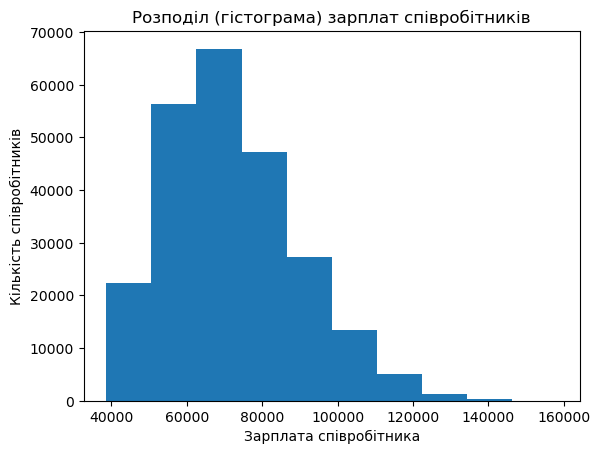

In [214]:
filtered_to_date['salary'].plot(
    kind='hist',
    title='Розподіл (гістограма) зарплат співробітників',
    ylabel='Кількість співробітників',
    xlabel='Зарплата співробітника'
)

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [216]:
con.close()